In [1]:
import tqdm
import random
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from stats import get_entropy, entropy_metric

plt.style.use("ggplot")
pd.options.display.float_format = "{:,.6f}".format

In [2]:
bunch = load_iris()
X, y = bunch["data"], bunch["target"]
df = pd.concat([pd.DataFrame(X, columns=[f"X{i}" for i in range(X.shape[1])]),
                pd.Series(y,name="Y")],axis=1)

In [3]:
def get_mutual_information(df:pd.DataFrame):
    marginal_probabilitys = df.apply(get_entropy)
    joint_probability = entropy_metric(df.groupby(df.columns.tolist())
                                          .size()
                                          .div(len(df)))

    return marginal_probabilitys.sum() - joint_probability

get_mutual_information(df)

12.29907330192967

In [11]:
def create_bins(x, n_bin):
    aux = pd.cut(x,n_bin)
    return aux

for bins in range(1, 2):
    i2 = (df.apply(create_bins, args=[bins])
             .pipe(get_mutual_information) 
         )
    print(f"\033[1mbins:{bins} - I(X,T1,T2) estimada: {i2:.8f}\n\033[0m")    

bins:1 - I(X,T1,T2) estimada: 0.00000000



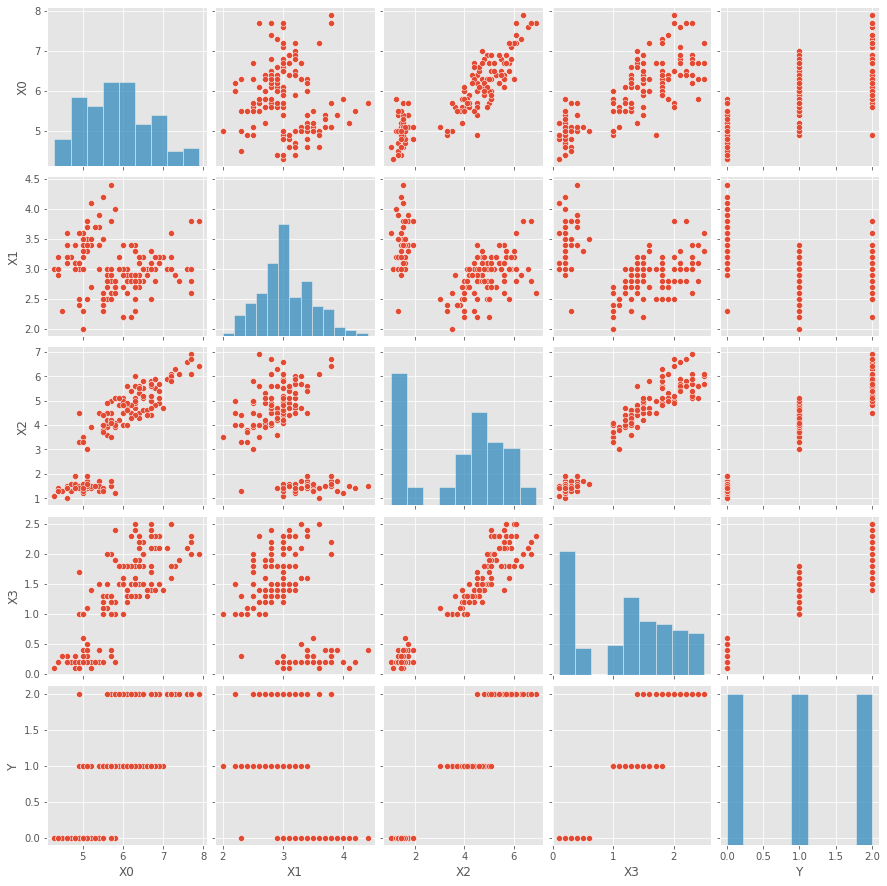

In [29]:
sns.pairplot(df)

100%|██████████| 4/4 [00:03<00:00,  1.22it/s]


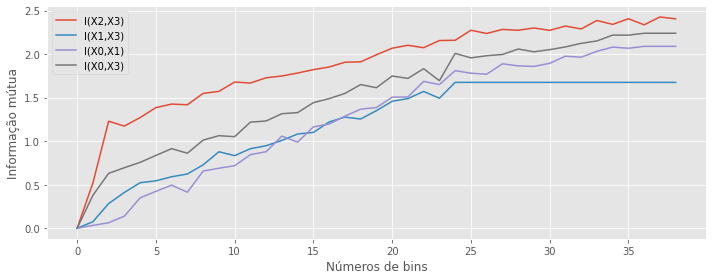

In [42]:
qtd_bins = 40

fig, ax = plt.subplots(1,1,figsize = (10,4))
variables = [["X2", "X3"], ["X1", "X3"], ["X0", "X1"], ["X0", "X3"]]

for var in tqdm.tqdm(variables):
    info = [df.filter(var).apply(create_bins, args=[bins]).pipe(get_mutual_information) 
         for bins in range(1,qtd_bins)]
    ax.plot(info, label=f"I({var[0]},{var[1]})")
ax.set_ylabel(f"Informação mútua")
ax.set_xlabel(f"Números de bins")

plt.legend()
plt.tight_layout()
plt.show()

100%|██████████| 4/4 [00:03<00:00,  1.16it/s]


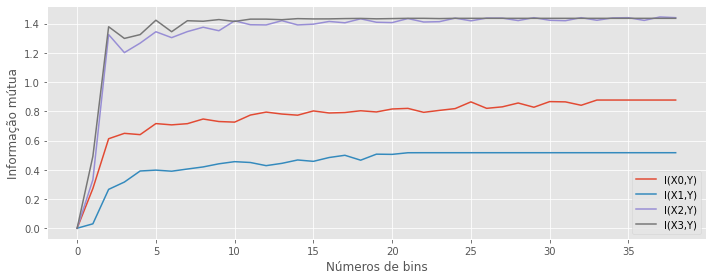

In [43]:
qtd_bins = 40

fig, ax = plt.subplots(1,1,figsize = (10,4))
variables = [["X0", "Y"], ["X1", "Y"], ["X2", "Y"], ["X3", "Y"]]

for var in tqdm.tqdm(variables):
    info = [df.filter(var).apply(create_bins, args=[bins]).pipe(get_mutual_information) 
         for bins in range(1,qtd_bins)]
    ax.plot(info, label=f"I({var[0]},{var[1]})")
ax.set_ylabel(f"Informação mútua")
ax.set_xlabel(f"Números de bins")

plt.legend()
plt.tight_layout()
plt.show()